In [1]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import gym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
time_steps = 1e6 #testrun
#time_steps = 1000000 #for prod or even more *10?100?
time_steps_test = int(time_steps/100)

from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import PPO2
from stable_baselines import results_plotter
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
from stable_baselines import ACKTR
from stable_baselines import HER
from stable_baselines import SAC

os.makedirs("logs_test", exist_ok=True)
os.makedirs("logs_train", exist_ok=True)
os.makedirs("logs_tmp", exist_ok=True)
from shutil import copyfile
from utils import *

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## PPO2





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



time_steps_todo: 1000000.0


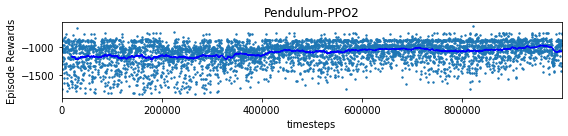

CPU times: user 25min 26s, sys: 2min 41s, total: 28min 7s
Wall time: 21min 48s


In [2]:
%%time
envname="Pendulum-v0"
env = gym.make(envname)
exp_name=env.spec._env_name+'-PPO2'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


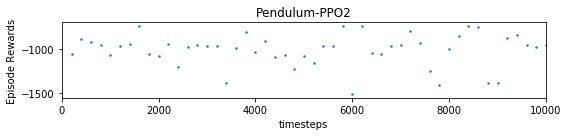

CPU times: user 13 s, sys: 1.08 s, total: 14.1 s
Wall time: 11.8 s


In [3]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = PPO2.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


time_steps_todo: 1000000.0
Track generation: 1058..1334 -> 276-tiles track
Track generation: 1142..1439 -> 297-tiles track
Track generation: 1340..1679 -> 339-tiles track
Track generation: 1101..1380 -> 279-tiles track
Track generation: 1050..1323 -> 273-tiles track
Track generation: 1152..1451 -> 299-tiles track
Track generation: 1230..1542 -> 312-tiles track
Track generation: 1171..1468 -> 297-tiles track
Track generation: 1135..1423 -> 288-tiles track
Track generation: 1106..1389 -> 283-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1132..1419 -> 287-tiles track
Track generation: 1072..1344 -> 272-tiles track
Track generation: 1095..1373 -> 278-tiles track
Track generation: 1116..1406 -> 290-tiles track
Track generation: 1112..1399 -> 287-tiles track
Track generation: 1148..1439 -> 291-tiles track
Track generation: 1352..1694 -> 342-tiles track
Track generation: 1116..1399 -> 283-tiles track
Track generation: 1212..1518 -> 306-t

Track generation: 1159..1453 -> 294-tiles track
Track generation: 1183..1483 -> 300-tiles track
Track generation: 1051..1318 -> 267-tiles track
Track generation: 1232..1544 -> 312-tiles track
Track generation: 1064..1334 -> 270-tiles track
Track generation: 1146..1440 -> 294-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1071..1343 -> 272-tiles track
Track generation: 1182..1481 -> 299-tiles track
Track generation: 1075..1348 -> 273-tiles track
Track generation: 1214..1522 -> 308-tiles track
Track generation: 1085..1367 -> 282-tiles track
Track generation: 1218..1536 -> 318-tiles track
Track generation: 1037..1300 -> 263-tiles track
Track generation: 1155..1448 -> 293-tiles track
Track generation: 1021..1289 -> 268-tiles track
Track generation: 1048..1314 -> 266-tiles track
Track generation: 1186..1487 -> 301-tiles track
Track generation: 1308..1639 -> 331-tiles track
Track generation: 1174..1471 -> 297-tiles track
Track generation

Track generation: 1105..1385 -> 280-tiles track
Track generation: 1200..1505 -> 305-tiles track
Track generation: 1148..1447 -> 299-tiles track
Track generation: 1254..1572 -> 318-tiles track
Track generation: 1131..1418 -> 287-tiles track
Track generation: 1187..1488 -> 301-tiles track
Track generation: 1081..1355 -> 274-tiles track
Track generation: 1137..1434 -> 297-tiles track
Track generation: 1129..1415 -> 286-tiles track
Track generation: 981..1233 -> 252-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1010..1271 -> 261-tiles track
Track generation: 1179..1478 -> 299-tiles track
Track generation: 1094..1377 -> 283-tiles track
Track generation: 1175..1473 -> 298-tiles track
Track generation: 1163..1458 -> 295-tiles track
Track generation: 1146..1445 -> 299-tiles track
Track generation: 1209..1515 -> 306-tiles track
Track generation: 1196..1504 -> 308-tiles track
Track generation: 1261..1580 -> 319-tiles track
Track generation:

Track generation: 1172..1469 -> 297-tiles track
Track generation: 1100..1387 -> 287-tiles track
Track generation: 1224..1534 -> 310-tiles track
Track generation: 1051..1327 -> 276-tiles track
Track generation: 1197..1500 -> 303-tiles track
Track generation: 1170..1460 -> 290-tiles track
Track generation: 1284..1609 -> 325-tiles track
Track generation: 1131..1425 -> 294-tiles track
Track generation: 1123..1407 -> 284-tiles track
Track generation: 1147..1438 -> 291-tiles track
Track generation: 1147..1438 -> 291-tiles track
Track generation: 1033..1302 -> 269-tiles track
Track generation: 1239..1553 -> 314-tiles track
Track generation: 1042..1313 -> 271-tiles track
Track generation: 1148..1439 -> 291-tiles track
Track generation: 1101..1380 -> 279-tiles track
Track generation: 1092..1369 -> 277-tiles track
Track generation: 1299..1638 -> 339-tiles track
Track generation: 1069..1340 -> 271-tiles track
Track generation: 1456..1824 -> 368-tiles track
Track generation: 1199..1503 -> 304-tile

Track generation: 1050..1316 -> 266-tiles track
Track generation: 1356..1699 -> 343-tiles track
Track generation: 1300..1629 -> 329-tiles track
Track generation: 1151..1443 -> 292-tiles track
Track generation: 1197..1500 -> 303-tiles track
Track generation: 1072..1353 -> 281-tiles track
Track generation: 1224..1534 -> 310-tiles track
Track generation: 1015..1278 -> 263-tiles track
Track generation: 1126..1412 -> 286-tiles track
Track generation: 1044..1307 -> 263-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1097..1381 -> 284-tiles track
Track generation: 1125..1417 -> 292-tiles track
Track generation: 1236..1549 -> 313-tiles track
Track generation: 1015..1273 -> 258-tiles track
Track generation: 1143..1433 -> 290-tiles track
Track generation: 1200..1504 -> 304-tiles track
Track generation: 1173..1471 -> 298-tiles track
Track generation: 1136..1424 -> 288-tiles track
Track generation: 1119..1403 -> 284-tiles track
Track generation

Track generation: 1056..1324 -> 268-tiles track
Track generation: 1124..1409 -> 285-tiles track
Track generation: 1104..1384 -> 280-tiles track
Track generation: 1076..1349 -> 273-tiles track
Track generation: 1175..1473 -> 298-tiles track
Track generation: 1159..1453 -> 294-tiles track
Track generation: 1031..1299 -> 268-tiles track
Track generation: 1063..1340 -> 277-tiles track
Track generation: 1198..1503 -> 305-tiles track
Track generation: 964..1208 -> 244-tiles track
Track generation: 1141..1430 -> 289-tiles track
Track generation: 1147..1442 -> 295-tiles track
Track generation: 959..1206 -> 247-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1245..1560 -> 315-tiles track
Track generation: 1290..1616 -> 326-tiles track
Track generation: 1067..1338 -> 271-tiles track
Track generation: 1253..1570 -> 317-tiles track
Track generation: 1118..1401 -> 283-tiles track
Track generation: 1349..1690 -> 341-tiles track
Track generation: 

Track generation: 1160..1459 -> 299-tiles track
Track generation: 1456..1824 -> 368-tiles track
Track generation: 1247..1563 -> 316-tiles track
Track generation: 1226..1540 -> 314-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1087..1369 -> 282-tiles track
Track generation: 1331..1668 -> 337-tiles track
Track generation: 1005..1266 -> 261-tiles track
Track generation: 1236..1555 -> 319-tiles track
Track generation: 1092..1369 -> 277-tiles track
Track generation: 1161..1455 -> 294-tiles track
Track generation: 1040..1304 -> 264-tiles track
Track generation: 1132..1419 -> 287-tiles track
Track generation: 1088..1371 -> 283-tiles track
Track generation: 1043..1308 -> 265-tiles track
Track generation: 1121..1405 -> 284-tiles track
Track generation: 1216..1524 -> 308-tiles track
Track generation: 1133..1420 -> 287-tiles track
Track generation: 1195..1498 -> 303-tiles track
Track generation: 1168..1463 -> 295-tiles track
Track generation

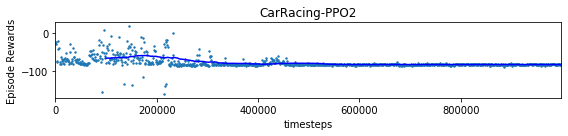

CPU times: user 7h 59min 21s, sys: 19min 1s, total: 8h 18min 23s
Wall time: 6h 40min 7s


In [4]:
%%time
envname="CarRacing-v0"
env = gym.make(envname)
exp_name=env.spec._env_name+'-PPO2'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


Track generation: 1222..1532 -> 310-tiles track
Track generation: 1184..1484 -> 300-tiles track
Track generation: 1127..1419 -> 292-tiles track
Track generation: 1007..1263 -> 256-tiles track
Track generation: 1404..1759 -> 355-tiles track
Track generation: 1104..1389 -> 285-tiles track
Track generation: 1113..1398 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1376..1733 -> 357-tiles track
Track generation: 1114..1404 -> 290-tiles track
Track generation: 1299..1628 -> 329-tiles track
Track generation: 1151..1448 -> 297-tiles track
Track generation: 1098..1385 -> 287-tiles track


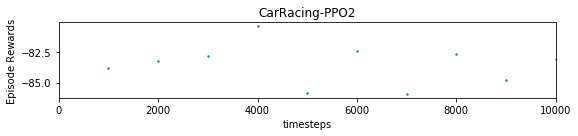

CPU times: user 2min 58s, sys: 6.52 s, total: 3min 4s
Wall time: 3min 19s


In [5]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = PPO2.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


time_steps_todo: 1000000.0


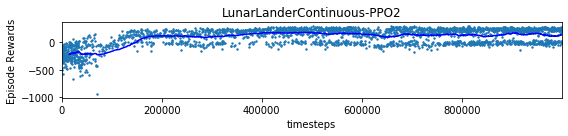

CPU times: user 48min 13s, sys: 3min 45s, total: 51min 58s
Wall time: 43min 33s


In [6]:
%%time
envname="LunarLanderContinuous-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-PPO2'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()



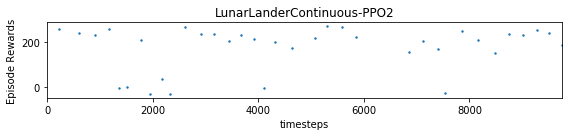

CPU times: user 20.6 s, sys: 1.09 s, total: 21.7 s
Wall time: 18.8 s


In [7]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = PPO2.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


time_steps_todo: 1000000.0


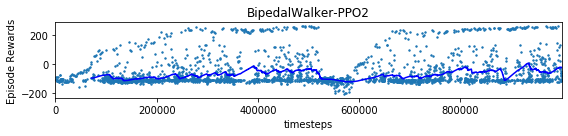

CPU times: user 27min 13s, sys: 2min 11s, total: 29min 24s
Wall time: 4h 6min 22s


In [8]:
%%time
envname="BipedalWalker-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-PPO2'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


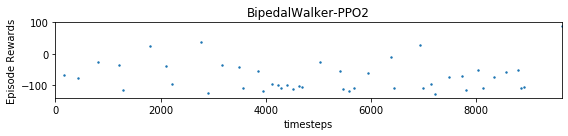

CPU times: user 12.4 s, sys: 617 ms, total: 13 s
Wall time: 10.7 s


In [9]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = PPO2.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()
